# Visualisation of the different electricity generation sources

This notebook breaks down total electricity generation into its main sources.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-colorblind")

data_dir = os.path.join(os.path.dirname(os.getcwd()), "data", "processed")

# Load BMRS data (generation, demand, prices)
df_bmrs = pd.read_csv(
    os.path.join(data_dir, "bmrs_data.csv"),
    parse_dates=["SETTLEMENT_DATE"],
)

# Sort by date and period
df_bmrs = df_bmrs.sort_values(["SETTLEMENT_DATE", "SETTLEMENT_PERIOD"])

# Set date and period as index
df_bmrs.set_index(["SETTLEMENT_DATE", "SETTLEMENT_PERIOD"], inplace=True)

print("BMRS dataset:\n")
print(df_bmrs.info())

BMRS dataset:

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 68208 entries, (Timestamp('2021-01-01 00:00:00'), np.int64(1)) to (Timestamp('2024-12-31 00:00:00'), np.int64(48))
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BIOMASS            68208 non-null  float64
 1   GAS                68208 non-null  float64
 2   COAL               68208 non-null  float64
 3   OIL                68208 non-null  float64
 4   NUCLEAR            68208 non-null  float64
 5   SOLAR              68208 non-null  float64
 6   WIND               68208 non-null  float64
 7   OTHER              68208 non-null  float64
 8   INTER              68208 non-null  float64
 9   INDO               68208 non-null  float64
 10  ITSO               68208 non-null  float64
 11  ELECTRICITY_PRICE  68208 non-null  float64
 12  TRADING_VOLUME     68208 non-null  float64
dtypes: float64(13)
memory usage: 7.0 MB
None


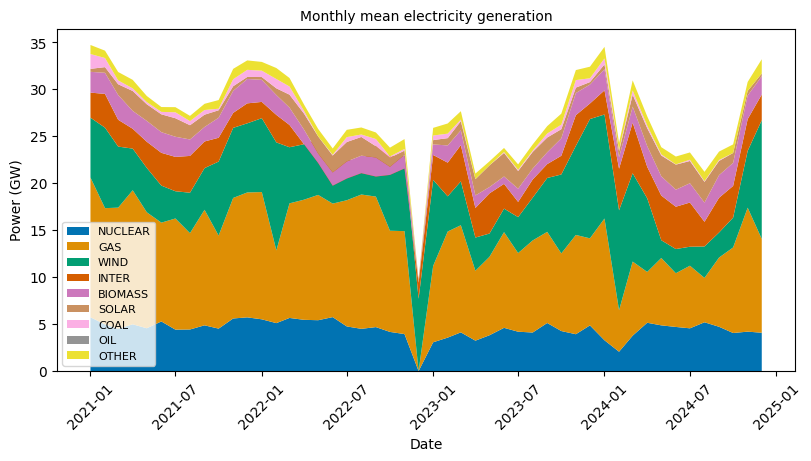

In [2]:
from matplotlib.dates import DateFormatter

generation_types = [
    "NUCLEAR", "GAS", "WIND", "INTER", "BIOMASS",
    "SOLAR", "COAL", "OIL", "OTHER"
]

# Group by year-month and take mean
df = df_bmrs.reset_index()
df["year_month"] = df["SETTLEMENT_DATE"].dt.to_period("M")
monthly_gen_by_type = df.groupby("year_month")[generation_types].mean()

# Convert period index back to datetime for plotting
monthly_gen_by_type.index = monthly_gen_by_type.index.to_timestamp()

fig, ax = plt.subplots(figsize=(16 / 2, 9 / 2), layout="constrained")

ax.set_title("Monthly mean electricity generation", fontsize=10)
colors = sns.color_palette("colorblind", len(generation_types))

xdata = monthly_gen_by_type.index
ydata = [monthly_gen_by_type[gt] / 1000 for gt in generation_types]
ax.stackplot(xdata, ydata, labels=generation_types, colors=colors)

ax.legend(fontsize=8, loc="best")
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
ax.set_xlabel("Date", fontsize=10)
ax.set_ylabel("Power (GW)", fontsize=10)
plt.xticks(rotation=45)
plt.show()

*Comments:*

Nuclear, gas and wind make up the majority of the UK's power generation.
There is some anomalous data around the end of 2022.

Plot electricity generation breakdown for the first week in October 2023:

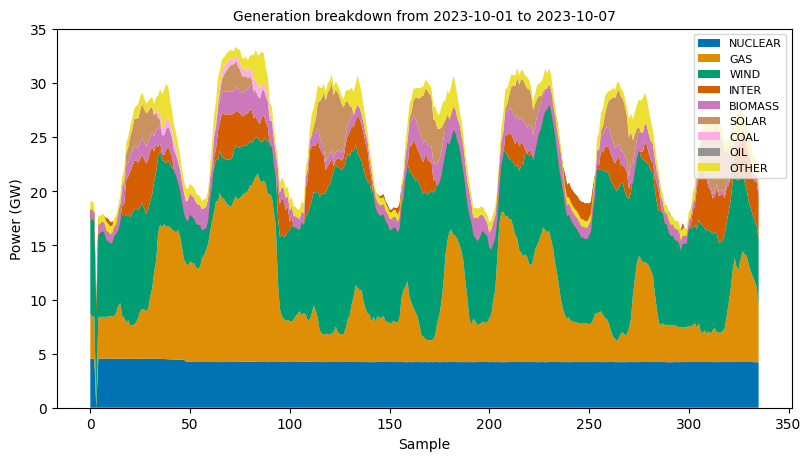

In [3]:
# select smaller date range for plotting
start_date = "2023-10-01"
end_date = "2023-10-07"
df_filtered = df_bmrs.loc[start_date:end_date]
gen_by_type = df_filtered[generation_types].reset_index()

fig, ax = plt.subplots(figsize=(16 / 2, 9 / 2), layout="constrained")
colors = sns.color_palette("colorblind", len(generation_types))
ax.stackplot(
    np.arange(len(gen_by_type)),
    [gen_by_type[gt] / 1000 for gt in generation_types],
    labels=generation_types,
    colors=colors,
)
ax.legend(fontsize=8, loc="upper right")
ax.set_xlabel("Sample", fontsize=10)
ax.set_ylabel("Power (GW)", fontsize=10)
ax.set_title(
    f"Generation breakdown from {start_date} to {end_date}",
    fontsize=10
)
plt.show()

## Comments

- Nuclear, gas and wind make up the majority of the energy generation
- Nuclear generation is very stable
- There are large, daily fluctuations in energy generation
- Energy from interconnectors is mostly positive, indicating that 
    imports are larger than exports
- Solar generation coincides with early peak hours
- Oil generation is neglibible
- There are clearly seasonal patterns in both wind and solar generation 
    (more solar during summers, more wind during winters).
- There are some anomalies in the generation data around the end of 2022, 
    spring 2023 and the beginning of 2024 that indicate incorrect 
    measurement or missing values for non-renewable energy sources.